In [2]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read data
train = pd.read_csv('data/train.csv')
# shuffle
train = train.sample(frac=1)

In [5]:
labels = train.iloc[:,0].values.astype('int32')
x_train = (train.iloc[:,1:].values).astype('float32')
x_test = (pd.read_csv('data/test.csv').values).astype('float32')

In [6]:
# one hot encoding
y_train = np_utils.to_categorical(labels)

In [7]:
scale = np.max(x_train)
x_train /= scale
x_test /= scale

mean = np.std(x_train)
x_train -= mean
x_test -= mean

In [8]:
input_dim = x_train.shape[1]
nb_classes = y_train.shape[1]

In [14]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 18s - loss: 0.4663 - acc: 0.8528 - val_loss: 0.1854 - val_acc: 0.9421
Epoch 2/10
 - 21s - loss: 0.2603 - acc: 0.9201 - val_loss: 0.1468 - val_acc: 0.9555
Epoch 3/10
 - 14s - loss: 0.2188 - acc: 0.9321 - val_loss: 0.1621 - val_acc: 0.9479
Epoch 4/10
 - 15s - loss: 0.1981 - acc: 0.9401 - val_loss: 0.1438 - val_acc: 0.9562
Epoch 5/10
 - 14s - loss: 0.1833 - acc: 0.9439 - val_loss: 0.1461 - val_acc: 0.9567
Epoch 6/10
 - 14s - loss: 0.1686 - acc: 0.9482 - val_loss: 0.1208 - val_acc: 0.9640
Epoch 7/10
 - 14s - loss: 0.1617 - acc: 0.9495 - val_loss: 0.1076 - val_acc: 0.9676
Epoch 8/10
 - 14s - loss: 0.1503 - acc: 0.9535 - val_loss: 0.1192 - val_acc: 0.9679
Epoch 9/10
 - 14s - loss: 0.1468 - acc: 0.9540 - val_loss: 0.1072 - val_acc: 0.9690
Epoch 10/10
 - 14s - loss: 0.1434 - acc: 0.9566 - val_loss: 0.1314 - val_acc: 0.9600


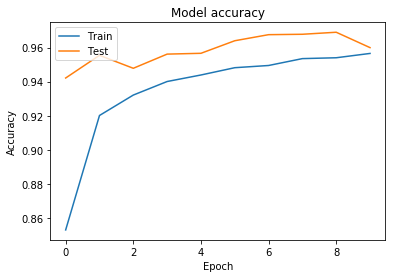

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

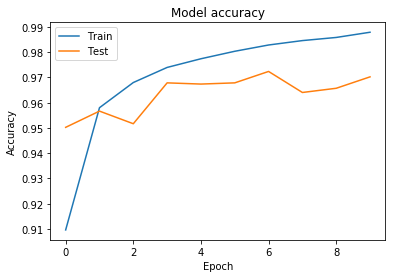

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

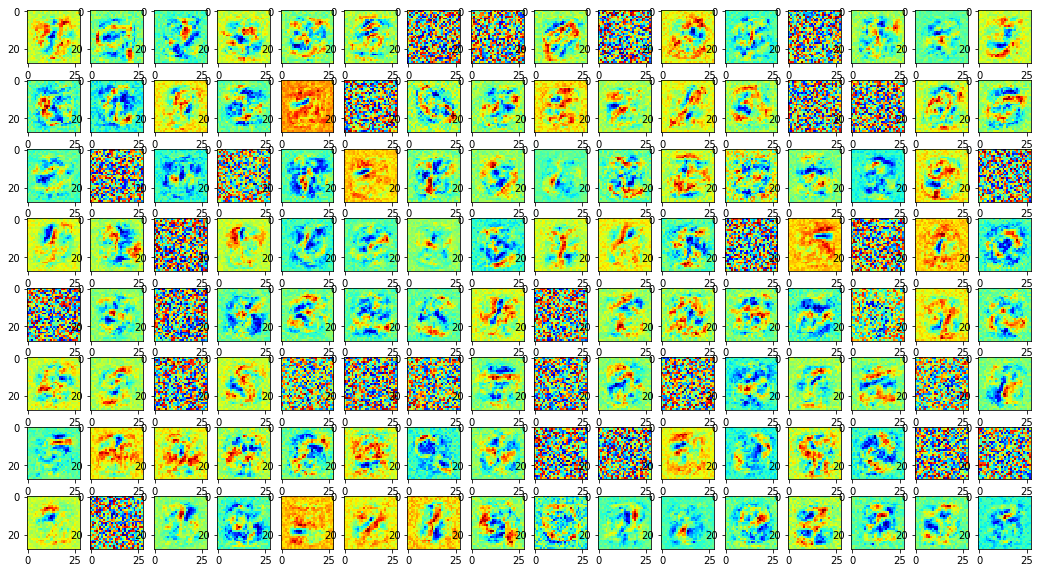

In [13]:
layer_0_weights_and_biases = model.layers[0].get_weights()
layer_0_weights = layer_0_weights_and_biases[0]
layer_0_weights /= np.max(layer_0_weights)
fig = plt.figure(figsize=(18, 10))
for i in range(128):
    weights_pic = layer_0_weights[:,i].reshape(28, 28)
    fig.add_subplot(8, 16, i + 1)
    plt.imshow(weights_pic, cmap='jet')

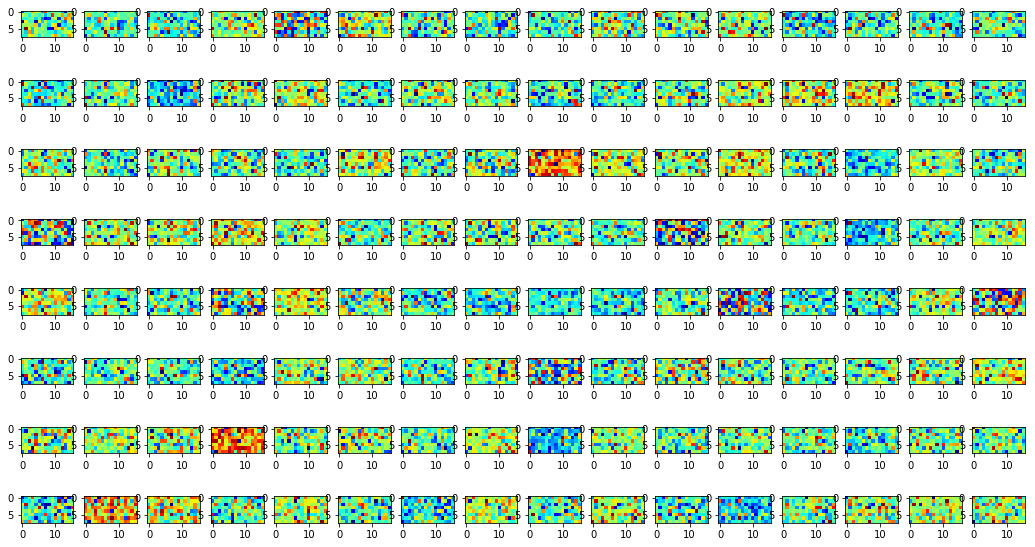

In [39]:
layer_3_weights_and_biases = model.layers[3].get_weights()
layer_2_weights = layer_2_weights_and_biases[0]
scale = np.max(layer_2_weights)
layer_2_weights /= scale
fig = plt.figure(figsize=(18, 10))
for i in range(128):
    weights_pic = layer_2_weights[:,i].reshape(8, 16)
    fig.add_subplot(8, 16, i + 1)
    plt.imshow(weights_pic, cmap='jet')

In [18]:
predictions = model.predict_classes(x_test, verbose=0)

In [19]:
def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(predictions, "data/keras-mlp.csv")